In [1]:
cd ../jecs

/Users/dan/Documents/GitHub/ExpPro/jecs


In [2]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import torch
import os
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import numpy as np
import importlib
import dataset

In [3]:
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")


Computation device: cpu



In [4]:
directory_path = '/Users/dan/Downloads/download'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
file_paths

['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root',
 '/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root',
 '/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']

In [6]:
fp = ['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root','/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root']

# Initialize empty NumPy arrays
pts2 = np.empty((0,), dtype=np.float32)
etas2 = np.empty((0,), dtype=np.float32)
area2 = np.empty((0,), dtype=np.float32)
npvs2 = np.empty((0,), dtype=np.int32)
gen_pts2 = np.empty((0,), dtype=np.float32)
jecs2 = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts2, current_etas2, current_area2, current_npvs2, current_jecs2 in load_root_files(fp):
    pts2 = np.concatenate((pts2, np.array(current_pts2, dtype=np.float32)))
    etas2 = np.concatenate((etas2, np.array(current_etas2, dtype=np.float32)))
    area2 = np.concatenate((area2, np.array(current_area2, dtype=np.float32)))
    npvs2 = np.concatenate((npvs2, np.array(current_npvs2, dtype=np.int32)))
    jecs2 = np.concatenate((jecs2, np.array(current_jecs2, dtype=np.float32)))

# Now pts2, etas2, etc., are NumPy arrays with reduced memory overhead.


In [7]:
importlib.reload(dataset)
from dataset import JetEnergyCorrectionDataset
jec_dataset = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, jecs2)

/usr/local/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/15, Train Loss: 0.203467359, Validation Loss: 0.197710782

Best validation loss: 0.197710782153769

Saving best model for epoch: 1

Epoch 2/15, Train Loss: 0.194488926, Validation Loss: 0.194843472

Best validation loss: 0.19484347182688722

Saving best model for epoch: 2

Epoch 3/15, Train Loss: 0.193169482, Validation Loss: 0.192833544

Best validation loss: 0.1928335437807924

Saving best model for epoch: 3

Epoch 4/15, Train Loss: 0.192194344, Validation Loss: 0.192833298

Best validation loss: 0.19283329791627687

Saving best model for epoch: 4

Epoch 5/15, Train Loss: 0.191822902, Validation Loss: 0.191177543

Best validation loss: 0.19117754272103293

Saving best model for epoch: 5

Epoch 6/15, Train Loss: 0.191330485, Validation Loss: 0.195450854
Epoch 7/15, Train Loss: 0.191240916, Validation Loss: 0.192011443
Epoch 8/15, Train Loss: 0.191006628, Validation Loss: 0.192786606
Epoch 9/15, Train Loss: 0.190760974, Validation Loss: 0.190617126

Best validation loss: 0.1906

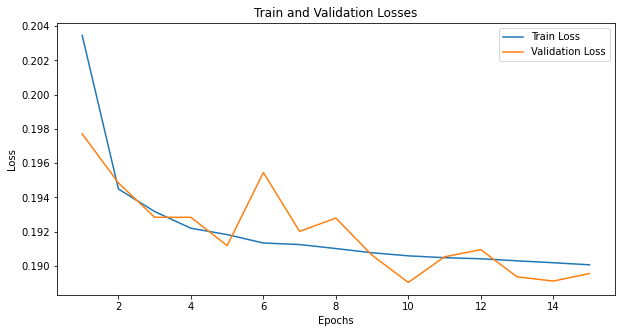

In [12]:
import train_copy as train
from j_model import ShallowMLP

j_model = ShallowMLP()
j_model.to(device)

train.train(j_model, jec_dataset,num_epochs=15)

Test MSE: 0.18801960349082947


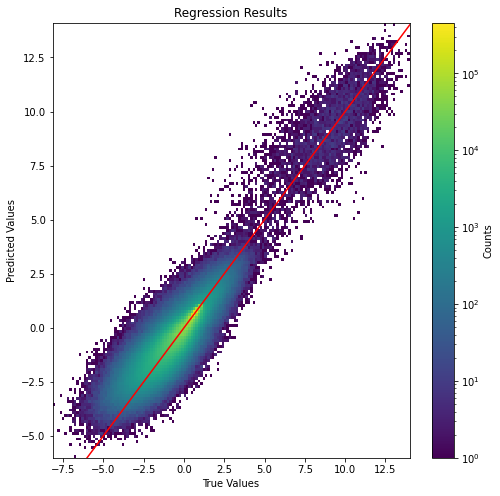

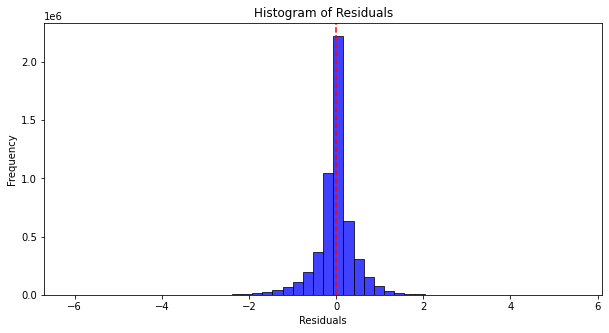

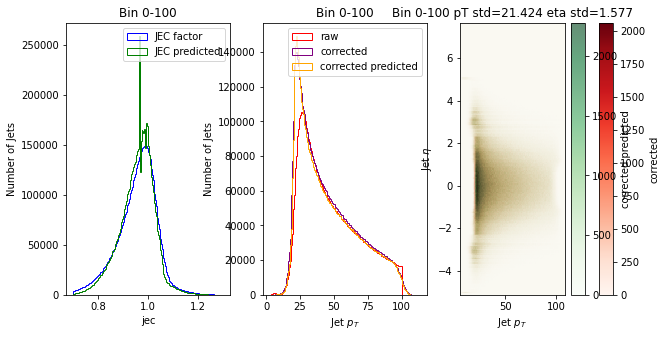

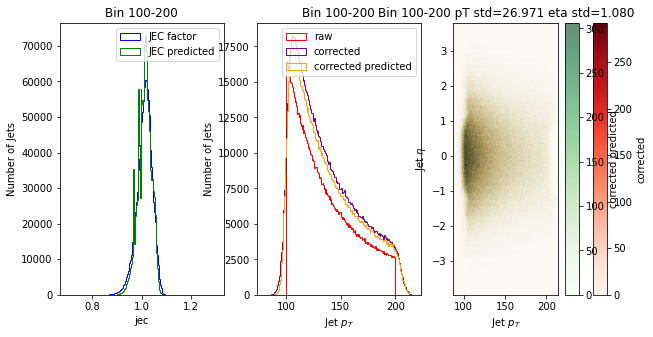

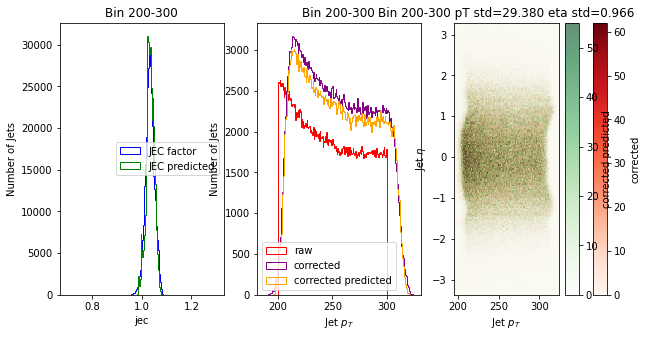

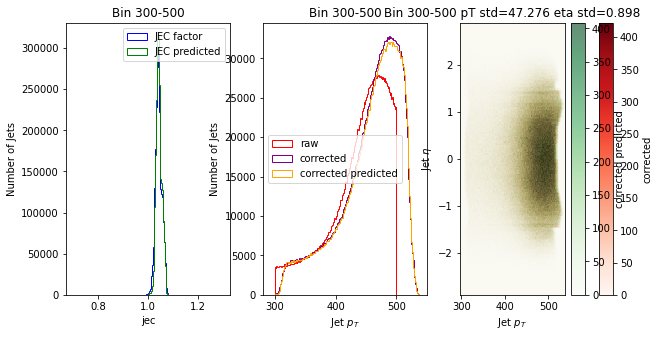

In [11]:
import importlib
import eval
importlib.reload(eval)
eval.run(jec_dataset)

In [14]:
fp = ['/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root','/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']
# Initialize empty NumPy arrays
pts_test = np.empty((0,), dtype=np.float32)
etas_test = np.empty((0,), dtype=np.float32)
area_test = np.empty((0,), dtype=np.float32)
npvs_test = np.empty((0,), dtype=np.int32)
jecs_test = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts_test, current_etas_test, current_area_test, current_npvs_test, current_jecs_test in load_root_files(fp):
    pts_test = np.concatenate((pts_test, np.array(current_pts_test, dtype=np.float32)))
    etas_test = np.concatenate((etas_test, np.array(current_etas_test, dtype=np.float32)))
    area_test = np.concatenate((area_test, np.array(current_area_test, dtype=np.float32)))
    npvs_test = np.concatenate((npvs_test, np.array(current_npvs_test, dtype=np.int32)))
    jecs_test = np.concatenate((jecs_test, np.array(current_jecs_test, dtype=np.float32)))

In [15]:
x=np.transpose(np.array([pts_test,etas_test,area_test,npvs_test]))
y=np.array(jecs_test)

In [16]:
from dataset import save_scaler, load_scaler
save_scaler(jec_dataset.scaler_x, jec_dataset.scaler_y)

Test MSE: 0.1502615064382553


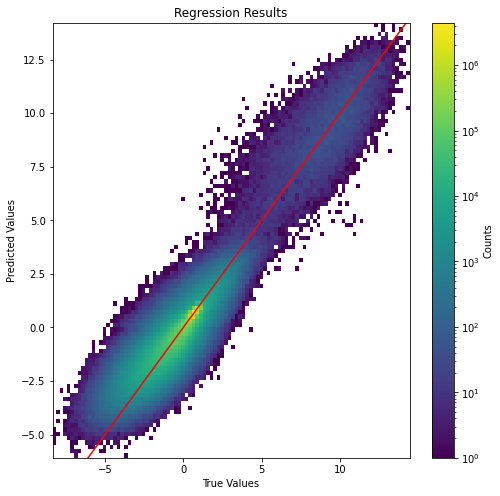

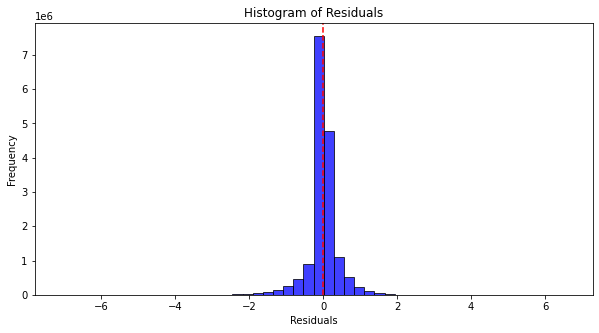

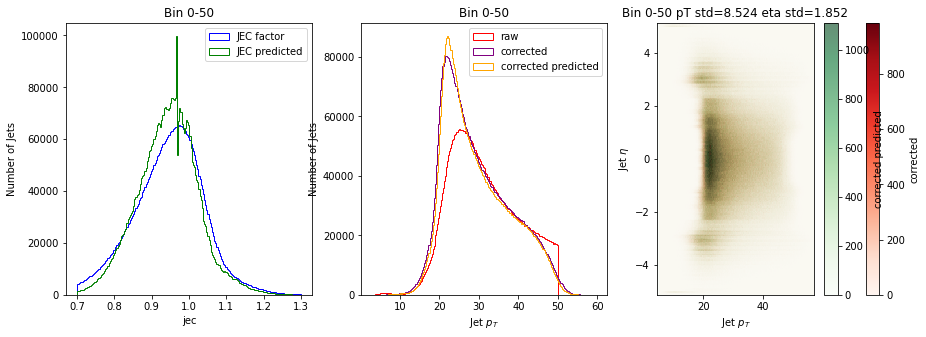

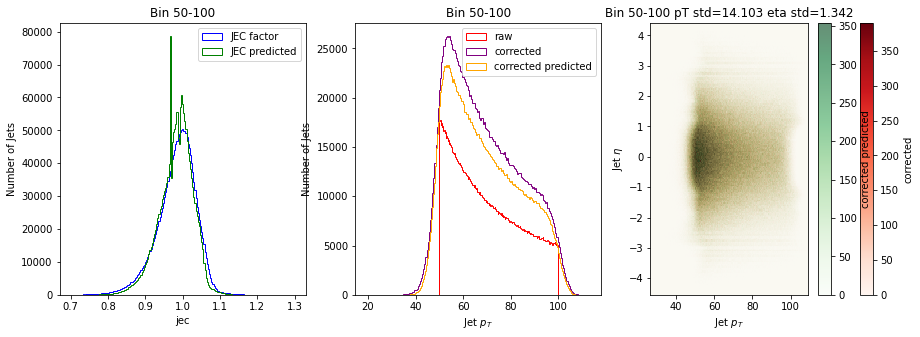

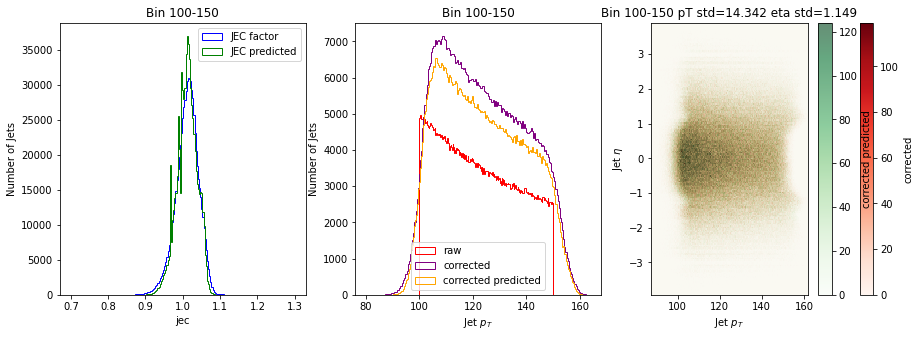

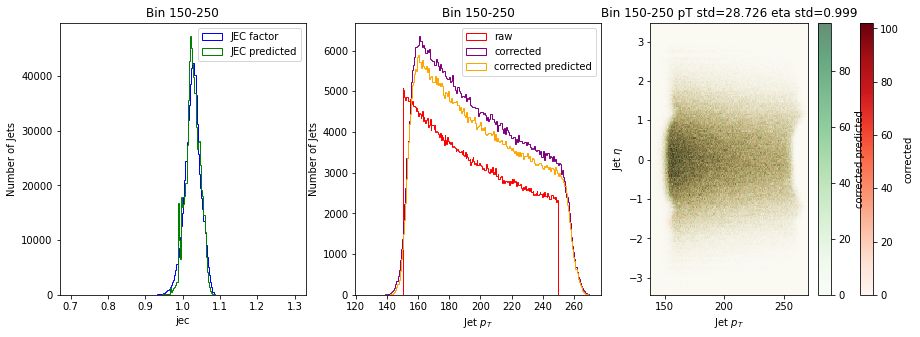

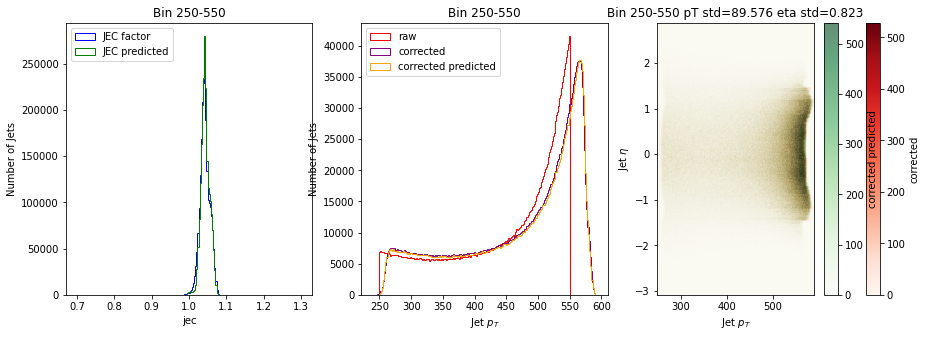

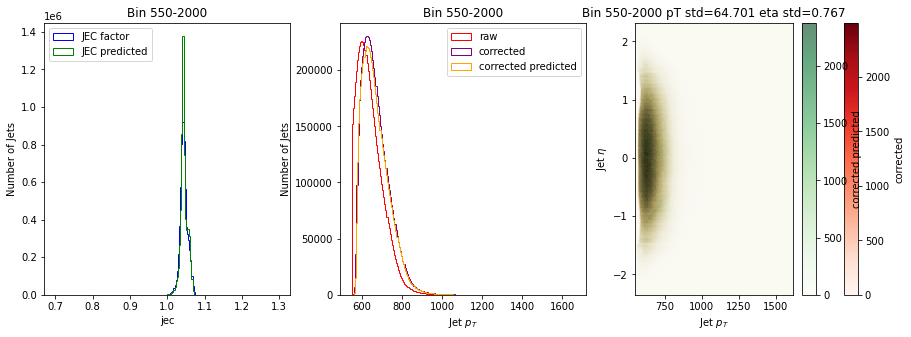

In [18]:
importlib.reload(dataset)

import eval_multiple_src as eval

importlib.reload(eval)
eval.run(x,y)

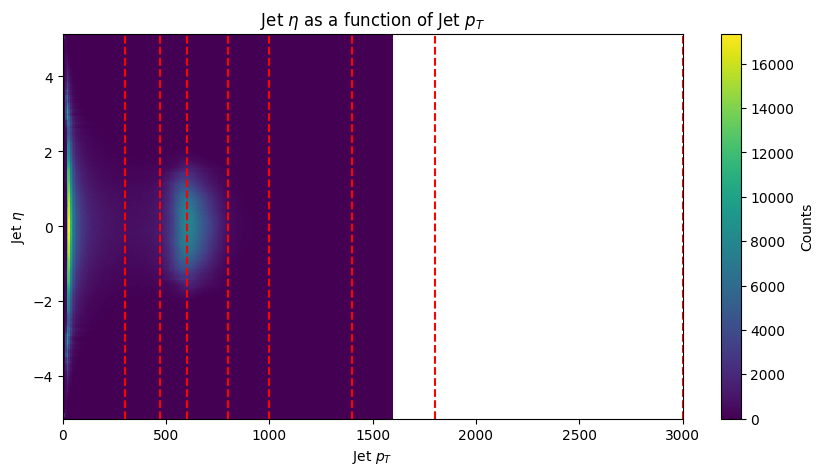

In [28]:
#not relevant to the model, just the data itself
from matplotlib import pyplot as plt
bins=np.array([300,470,600,800,1000,1400,1800,3000])

plt.figure(figsize=(10, 5))
plt.hist2d(pts2, etas2, bins=[200, 200], cmap='viridis')
plt.xlabel('Jet $p_T$')
plt.ylabel('Jet $\eta$')
plt.title('Jet $\eta$ as a function of Jet $p_T$')
plt.colorbar(label='Counts')

# Plot vertical lines for each bin value
for bin_value in bins:
    plt.axvline(x=bin_value, color='red', linestyle='--')

plt.xlim(0, 3000)

plt.show()
